
ЛАБОРАТОРНАЯ РАБОТА 8. ПОСТРОЕНИЕ ПАЙПЛАЙНА
ОДНОМЕРНОЙ РЕГРЕССИИ
Цели и задачи
Цель лабораторной работы: разработка единого пайплайна для решения
задачи регрессии.
Основные задачи:
- реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
- получение теоретических представлений о задаче регресии;
- получение навыков использования пайплайна при решении задачи машинного обучения;
- получение навыков рефакторинга кода в задачах машинного обучения.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
dataset = pd.read_csv('./Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print("Матрица признаков");
print(X[:5])
print("Зависимая переменная");
print(y[:5])

Матрица признаков
[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
Зависимая переменная
[39343. 46205. 37731. 43525. 39891.]


In [ ]:
# from sklearn.cross validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 41056.25705466 123597.70938378  65443.50433372  63567.56223533
 116093.94099022 108590.17259667 117031.91203942  64505.53328452]


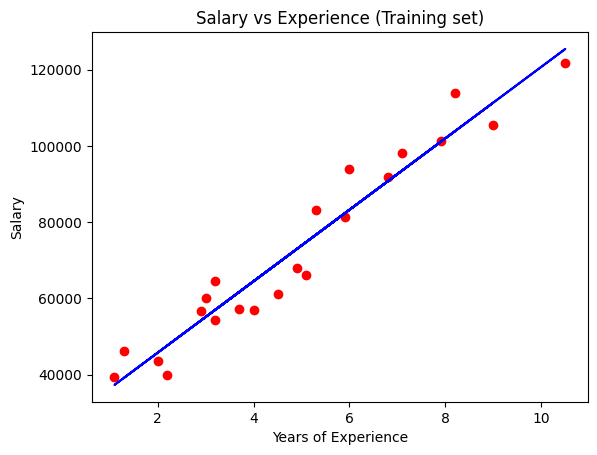

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

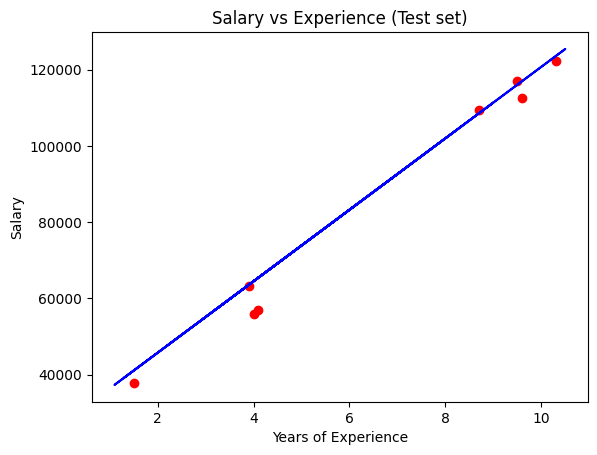

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Индивидуальное задание

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
uploaded = files.upload()

Saving bodyfat.csv to bodyfat.csv


In [ ]:
data = pd.read_csv("bodyfat.csv")
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# Признаки и целевая переменная
X = data.drop(columns=['BodyFat'])  # Все переменные, кроме 'BodyFat', являются признаками
y = data['BodyFat']  # Целевая переменная - содержание жира в организме

In [ ]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создание пайплайна
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Обработка пропущенных значений
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('regressor', LinearRegression())  # Модель линейной регрессии
])


In [ ]:
# Обучение модели
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Предсказания на тестовой выборке
y_pred = pipeline.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R^2 на тестовой выборке: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

R^2 на тестовой выборке: 0.9918244198502373
Mean Squared Error (MSE): 0.38031220947724453


R^2(Коэффициент детерминации) имеет Значение 0.9918, что  говорит о том, что модель объясняет 99.18% вариации в содержании жира в организме на основе признаков, которые использовались для обучения. Это очень хороший результат, указывающий на высокую точность модели.
MSE(среднеквадратичная ошибка) = 0.3803 указывает на малую ошибку предсказания, что подтверждает высокое качество модели.

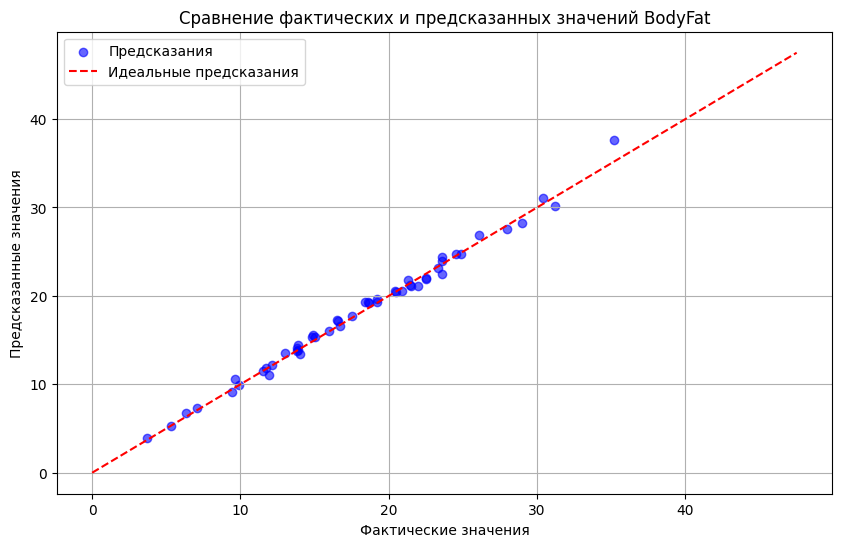

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  График фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Предсказания', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальные предсказания')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений BodyFat')
plt.legend()
plt.grid(True)
plt.show()

Красная линия на графике — это линия идеальных предсказаний (где фактические значения = предсказанные значения). Модель хорошая т.к. точки на графике очень близки к этой линии.  Модель делает предсказания, очень близкие к истинным значениям.

Вывод:
Модель линейной регрессии продемонстрировала отличные результаты при предсказании содержания жира в организме на основе различных физических признаков. Полученные значения R^2 и MSE подтверждают, что модель обладает высокой точностью и минимальными ошибками. Работа с пайплайном, обработка данных и использование линейной регрессии позволили нам достичь хороших результатов.

Это свидетельствует о том, что модель хорошо обобщает данные, и её можно использовать для предсказания содержания жира в организме на основе различных физических параметров.